# Project Planning Stage (Individual)

**Course:** DSCI 100

**Author:** Ning Hu

**Group:** 30

**Date:** Due Nov.15

**Question choose:**  1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In [24]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

## 1. Data Description

This project uses two tables collected from a research Minecraft server at UBC. Open the file, and we can see:

- `players.csv`: contains 198 rows, one row per player (that is 197 players), each column is a characteristic of the player: experience, subscribe, hashedEmail, played_hours, name, gender and age.
- `sessions.csv`: contains 1536 rows, one row per session (that is, 1535 sessions). Each column is a characteristic of the session: hashedEmail， start time， end time, original start time and original end time.

First let us load the 2 tables to the notebook using `read.csv`(since the data size is large so we just shou the first few rows in table and then clean the data)


In [25]:
players  <- read.csv("data/players.csv")
sessions <- read.csv("data/sessions.csv")
head(players)
head(sessions)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In this analysis, I decided to use only the `players.csv` dataset.
This file already includes all key player-level features needed to answer Question 1 — “Which player characteristics are most predictive of subscribing to the newsletter?”

The `players.csv` table contains one row per player and includes demographic and behavioral variables such as experience level, total played hours, gender, and age, as well as the subscription status (subscribe), which is our response variable.
These variables capture both player traits and a measure of overall engagement (played_hours), which are sufficient to explore how player characteristics relate to subscription behavior.

By contrast, the `sessions.csv` dataset records detailed, per-session data such as login times and durations.
While these data could later be used to create more granular engagement metrics (e.g., average session length, number of sessions per player), they are not required at this stage to form a clear and valid predictive question.

## 2. Questions

### 2.1 Question Formulation

My specific research question is:

#### Can a player’s experience level, total played hours, age, and gender predict whether they subscribe to the newsletter?

In this study, the response variable is subscribe, which indicates whether a player subscribed to the newsletter (TRUE or FALSE).
The explanatory variables are experience, played_hours, age, and gender. These describe each player’s engagement and demographic characteristics.

The goal is to understand which types of players are more likely to subscribe and to identify possible patterns in their engagement.
For example, we might expect players who spend more hours in the game or have higher experience levels to show stronger interest in community activities like newsletter subscription.


### 2.2 Data Cleaning

Before exploring the data, we first clean the `players.csv`.csv dataset to keep only the variables that are relevant to our predictive question.
Since our goal is to understand how player characteristics relate to newsletter subscription, we focus on variables that describe experience, demographics, and engagement.

We remove the following columns:

`hashedEmail`: this is an identifier used to link with the sessions dataset. It does not provide useful information for predicting subscription and should not be used to avoid data leakage.

`name`: not a meaningful feature and may contain personal information.

Now clean up those identity variables in data frame and keep other variables: experience, played_hours, age, gender, subscribe

In [26]:
players_clean <- select(players, experience, played_hours, Age, gender, subscribe)
players_clean

experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<lgl>
Pro,30.3,9,Male,TRUE
Veteran,3.8,17,Male,TRUE
Veteran,0.0,17,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Amateur,0.0,57,Prefer not to say,FALSE
Amateur,2.3,17,Male,FALSE
Pro,0.2,NA,Other,TRUE


## 3. Exploratory Data Analysis and Visualization

In this section, I explore the main variables in the cleaned players.csv dataset to understand their general patterns and how they might relate to the newsletter subscription status.
All plots and summaries are created using basic R functions for clarity and reproducibility.

### 3.1 Compute the mean value for each quantitative variable in the players.csv data set.

In [27]:
players_means <- players |>
  select(where(is.numeric)) |>
  map_df(~ round(mean(.x, na.rm = TRUE), 2))
players_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


### 3.2 Visualize Quantitative Variables

Before producing any plots, it is important to understand which categorical and numeric variables in the dataset may be relevant for predicting newsletter subscription.

#### 1）Visualize categorical variables. We now explore how the categorical variables are distributed.  

In the players.csv data, there are two main categorical variables:

`experience` — the player’s self-reported skill level (in limit categories)

`gender` — the gender identity selected by the player

Before deciding whether these variables should be used as predictors, it is important to understand how their categories are spread across the player population

We use **ggplot2** to:

- Plot **bar charts** for categorical variables， because it
1. Let us clearly see how many players belong to each category
2. Let us detect whether categories are balanced or highly uneven
3. Also assess whether categorical variables show enough variation to be useful predictors

- Label each axis clearly and use meaningful titles.  
- Use `facet_wrap()` to display multiple bar charts in one figure if there are several categorical columns

If a variable is highly imbalanced or shows little meaningful variation, it may contribute limited predictive value


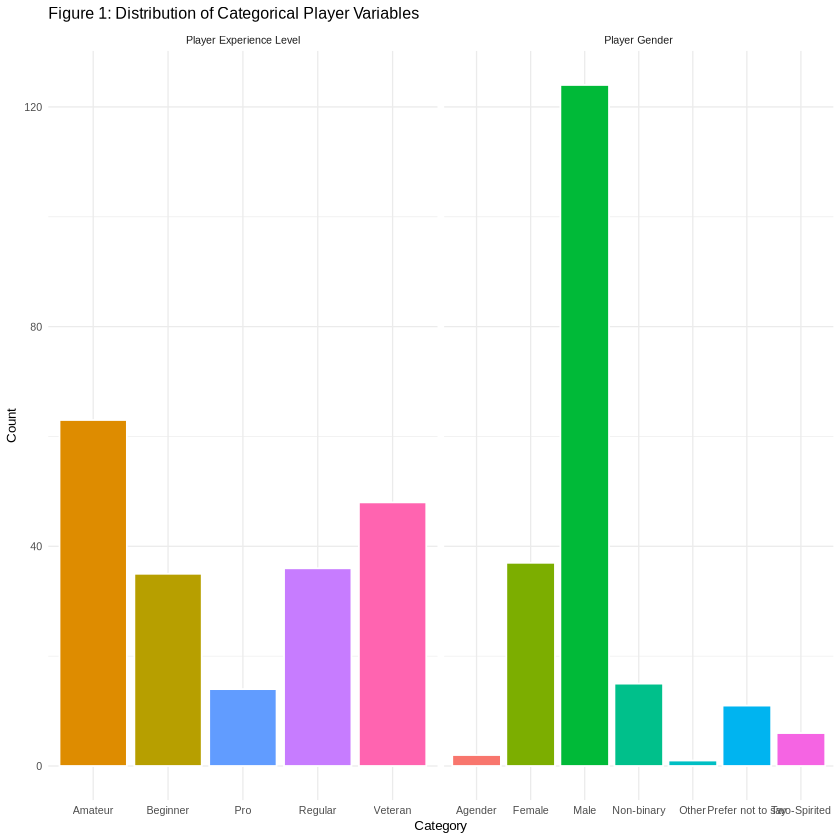

In [28]:
players_cat <- players_clean |>
  select(experience, gender) |>
  pivot_longer(cols = everything(),
               names_to = "Variable",
               values_to = "Category")

label_names_c <- c(
  "experience" = "Player Experience Level",
  "gender" = "Player Gender"
)

g_cat <- ggplot(players_cat, aes(x = Category, fill = Category)) +
  geom_bar(color = "white") +
  facet_wrap(~ Variable, scales = "free_x", labeller = as_labeller(label_names_c)) +
  labs(title = "Figure 1: Distribution of Categorical Player Variables",
       x = "Category",
       y = "Count") +
  theme_minimal(base_size = 8) +
  theme(legend.position = "none")

g_cat

#### Interpretation (Figure 1)

**Genders** are unevenly distributed, with some categories containing very few players (for example: Agender and other is way too small, male is way too big, and weight is too much)

**Experience levels** are relatively balanced, with only small differences

These results indicate that categorical variables may be **less informative or stable predictors** because their categories are highly **imbalanced**, provide limited variation, and show no clear separation that relates to subscription behaviour. Small category sizes can lead to unstable modelling, while the weak visual patterns suggest that these variables may contribute minimal predictive signal compared to the continuous numeric features.

#### 1）Visualize numeric variables. We now explore how the numeric variables are distributed.  
In the players.csv data, there are two main numeric variables:

`age` — the age of each player

`played_hours` — the gender identity selected by the player

Before using these variables in a predictive model, it is important to understand how they are distributed, whether they contain outliers, and whether the amount of variation they provide is meaningful

We use **ggplot2** to:

- Plot **histograms** for numeric variables， because it
1. Let us clearly see the overall shape of the distribution (for example: normal, skewed, uniform)
2. Let us detect whether outliers that may affect the model
3. Also assess whether numeric variables show enough variation to be useful predictors

- Label each axis clearly and use meaningful titles.  
- Use `facet_wrap()` to display multiple histograms in one figure if there are several numeric columns

If a numeric variable shows very limited variation or an extreme skew that cannot be corrected, it may have reduced predictive value. Conversely, strong variation and clear distributional patterns often indicate a more informative feature

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


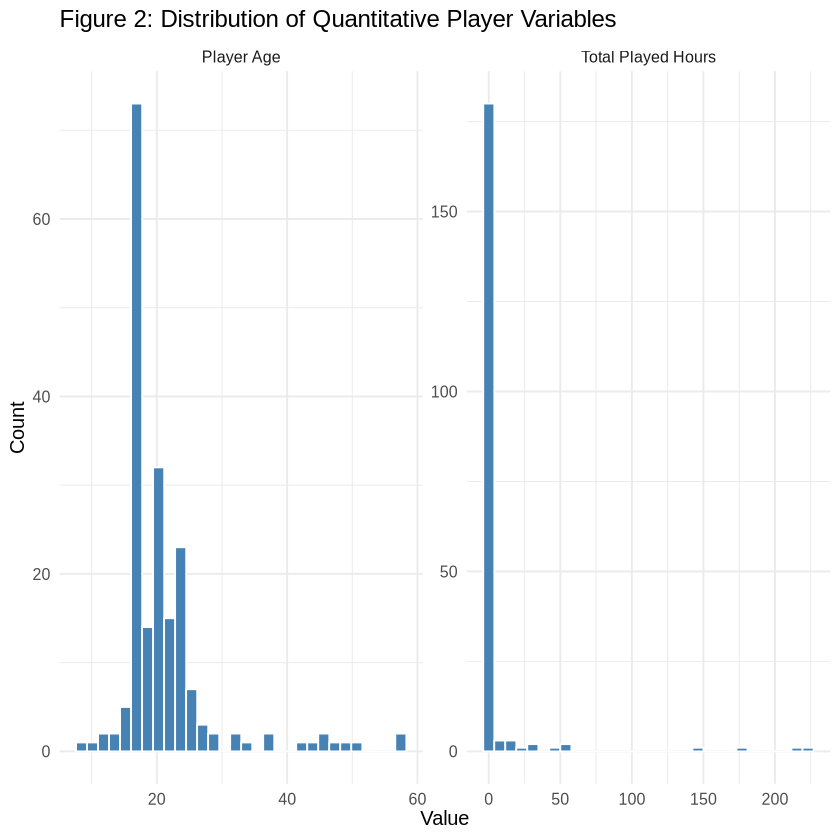

In [29]:
players_num <- players_clean |>
  select(where(is.numeric)) |>
  pivot_longer(cols = everything(),
               names_to = "Variable",
               values_to = "Value")

label_names_n <- c(
  "Age" = "Player Age",
  "played_hours" = "Total Played Hours"
)

g_num <- ggplot(players_num, aes(x = Value)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~ Variable, scales = "free", labeller = as_labeller(label_names_n)) +
  labs(title = "Figure 2: Distribution of Quantitative Player Variables",
       x = "Value",
       y = "Count") +
  theme_minimal(base_size = 12)
g_num

#### Interpretation (Figure 2)

**Player Age** has the majority of players are between 15 and 25 years old, forming a sharp peak(the highest is about 17). This creates a right-skewed distribution, but the main age group is clearly defined and shows meaningful variation within that range

**Total played hours** are also strongly right-skewed. Most players have only a few hours of playtime, while a small group shows extremely high engagement with very long sessions

These results indicate that the numeric variables display **clearer and more interpretable patterns** than the categorical variables. Both age and played hours vary across players in a way that may relate to subscription decisions, suggesting that numeric features are likely to contribute a more predictive signal and offer more stable modelling behaviour.

### 3.3 Comparison and Conclusion: Which Variables Are Most Useful?

After comparing the two types of variables, the categorical variables (Figure 1) do not show strong or useful patterns. Gender is very unbalanced, with some groups having almost no players, and experience levels do not clearly relate to subscription. Because of this, these variables are not very reliable for prediction.

The numeric variables (Figure 2) show much clearer patterns. Player age has a clear main group with some variation, and total played hours show big differences between casual and very active players. These differences may be linked to how likely a player is to subscribe.

Overall, the numeric variables give more information and vary in ways that can help a model learn. For this reason, the rest of the project will focus on using **age** and **played_hours** to predict whether a player **subscribes** to the newsletter.

## 4.Methods and Plan

For this project, the goal is to predict whether a player subscribes to the newsletter using the two numeric variables that showed the strongest patterns in the EDA: age and played_hours. Since the outcome variable (subscribe) is binary (yes/no), a **classification** method is needed

I plan to use a **K-Nearest Neighbours (KNN)** classification model to predict whether a player subscribes to the newsletter.

### 4.1 Why is this method appropriate?

I will use a **K-Nearest Neighbours (KNN)** classification model because it is a method taught in the lecture and is well-suited for predicting a **binary outcome** such as newsletter subscription. From the EDA, the **numeric variables** (age and played_hours) show clearer patterns and meaningful variation, which fits KNN well because it relies on the **distance between numeric features**. In contrast, the categorical variables were highly imbalanced and less informative.

### 4.2 Which assumptions are required?

KNN does **not require strong statistical assumptions** such as normality or linear relationships. However, it does rely on one practical assumption: the predictors must be on similar scales, because kNN uses distance to measure similarity. If variables have very different ranges, one variable can dominate the distance calculation. To satisfy this assumption, I will apply **centring and scaling** to the numeric predictors. Another assumption is that nearby points in feature space tend to have similar outcomes, which is reasonable for this dataset based on the patterns observed in the EDA.

### 4.3 What are the potential limitations?

kNN can be **sensitive to noise, outliers, and variables** with very different scales. It may also perform poorly if the choice of k is not appropriate. In addition, kNN can be affected by class imbalance, although subscription in this dataset is not extremely skewed. The method may also **slow down on large datasets**, but that is not an issue here.

### 4.4 How will you compare and select the model?
I will compare different values of k using **cross-validation** on the training set. The model with the highest cross-validated accuracy (or lowest error) will be selected. This ensures that the choice of **k is based on performance**, prevents overfitting, and follows the evaluation practices taught in the course.

### 4.5 How will you process the data to apply the model?

I will **split** the data into a **training set (80%)** and a **test set (20%)**
Cross-validation will be applied only on the training set to choose the **best value of k**
After selecting the best model, I will evaluate it on the test set to estimate generalization performance.